In [25]:
import numpy as np
import scipy.io.wavfile as wav
import scipy.signal as signal
import matplotlib.pyplot as plt
import pandas as pd
import IPython.display as ipd

In [2]:
sample_rate, audio_data = wav.read('../data/Glosy_zbior/Bartek_go_0.wav')

In [3]:
if len(audio_data.shape) > 1:
    audio_data = np.mean(audio_data, axis=1)

In [4]:
pre_emphasis = 0.97
emphasized_audio = np.append(audio_data[0], audio_data[1:] - pre_emphasis * audio_data[:-1])

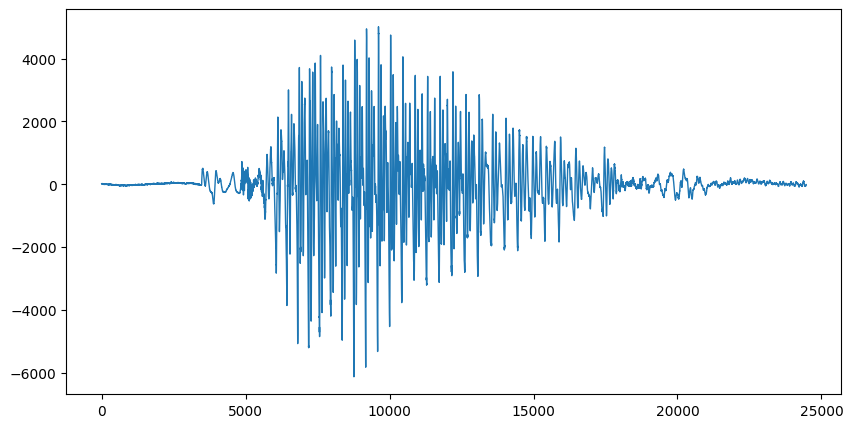

In [23]:
frame_length = 0.025  # Length of each frame in seconds
frame_shift = 0.01  # Shift between consecutive frames in seconds
fft_size = 512  # Size of the FFT (Fast Fourier Transform)
pd.Series(audio_data).plot(figsize=(10,5), lw=1)
plt.show()

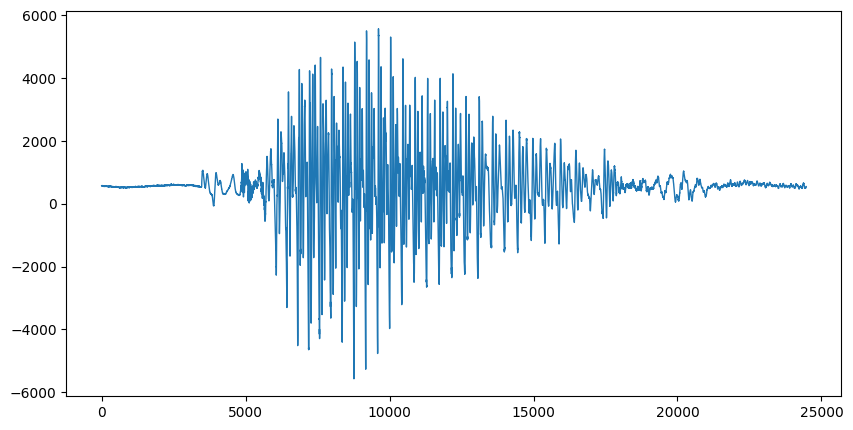

In [29]:
sample = audio_data * np.random.uniform(0, 2, size=audio_data.shape)
pd.Series(sample).plot(figsize=(10,5), lw=1)
plt.show()

In [30]:
ipd.Audio(sample, rate=sample_rate)

In [6]:
samples_per_frame = int(frame_length * sample_rate)
samples_per_shift = int(frame_shift * sample_rate)

In [7]:
window = signal.hamming(samples_per_frame)
num_frames = 1 + int((len(emphasized_audio) - samples_per_frame) / samples_per_shift)
frames = np.zeros((num_frames, samples_per_frame))

for i in range(num_frames):
    start = i * samples_per_shift
    frames[i] = emphasized_audio[start : start + samples_per_frame] * window


In [8]:
spectra = np.abs(np.fft.rfft(frames, n=fft_size))
power_spectra = spectra ** 2


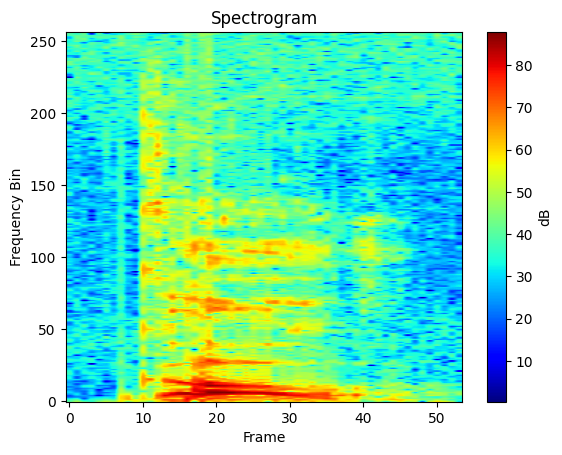

In [9]:
power_spectra_db = 10 * np.log10(1 + power_spectra)

# Display the spectrogram
plt.imshow(power_spectra_db.T, aspect='auto', origin='lower', cmap='jet')
plt.xlabel('Frame')
plt.ylabel('Frequency Bin')
plt.title('Spectrogram')
plt.colorbar(label='dB')
plt.show()

In [10]:
power_spectra_db.shape

(54, 257)

In [19]:
import h5py
with h5py.File('..\data\spectrograms.h5', 'r') as hdf:
    # print(hdf.keys())
    sample = hdf['peoples_aug_spectros']['1'][()]
    # print(hdf['peoples_aug_labels']['10'][()].decode('utf-8'))

In [20]:
sample.shape

(1025, 44)

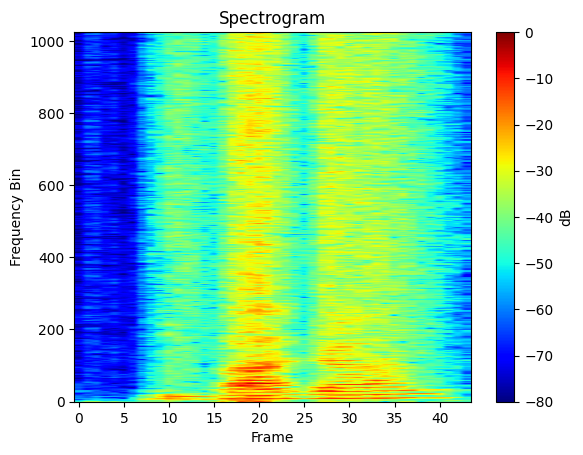

In [21]:
plt.imshow(sample, aspect='auto', origin='lower', cmap='jet')
plt.xlabel('Frame')
plt.ylabel('Frequency Bin')
plt.title('Spectrogram')
plt.colorbar(label='dB')
plt.show()